In [1]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import japanize_matplotlib

In [2]:
# CSVファイルが保存されているディレクトリ
csv_directory = '..'

# CSVファイルのパターン
csv_pattern = 'scanned_devices_avg_rssi_*.csv'

# ファイルのパスリストを取得
csv_files = glob.glob(os.path.join(csv_directory, csv_pattern))

# データを格納するリスト
all_data = []

# 各CSVファイルを読み込み、リストに追加
for file in csv_files:
    df = pd.read_csv(file)
    # ファイル名からタイムスタンプを取得し、列として追加
    try:
        timestamp_str = file.split('_')[-1].split('.')[0]
        print(timestamp_str)
        df['timestamp'] = pd.to_datetime(timestamp_str, format='%H%M%S')
    except IndexError:
        # ファイル名からタイムスタンプが取得できない場合はエラーメッセージを表示
        print(f"Warning: Could not extract timestamp from filename: {file}")
        df['timestamp'] = None # または適切なデフォルト値
    all_data.append(df)

# 全データを結合
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    # タイムスタンプでソート
    if 'timestamp' in combined_df.columns and combined_df['timestamp'].notna().all():
        combined_df = combined_df.sort_values('timestamp')
else:
    combined_df = pd.DataFrame()

print(f"読み込んだCSVファイル数: {len(csv_files)}")
if not combined_df.empty:
    print("結合データフレームの先頭:")
    print(combined_df.head())

214106
213949
213801
読み込んだCSVファイル数: 3
結合データフレームの先頭:
                                 address  average_rssi  \
39  DBC7C985-B455-116F-8516-6F9A8B6704D9    -76.111111   
27  33F3166F-66AF-C29D-A7A7-01B96892E636    -37.000000   
28  1E06F800-839F-7460-5649-13808E80BD0A    -47.142857   
30  A271566A-7828-A7DA-DC6B-276E3860386B    -58.139785   
31  FB43C079-A7B7-DFB8-8457-AC229A24A85F    -58.826087   

                                    manufacturer_data           timestamp  
39                                      004C:10020300 1900-01-01 21:38:01  
27  004C:02157bec01006bf04e64a0094d17999f3bee29100... 1900-01-01 21:38:01  
28                                      004C:12020001 1900-01-01 21:38:01  
30                                  00E0:01bfca3f9de8 1900-01-01 21:38:01  
31                                  0059:f303b749130e 1900-01-01 21:38:01  


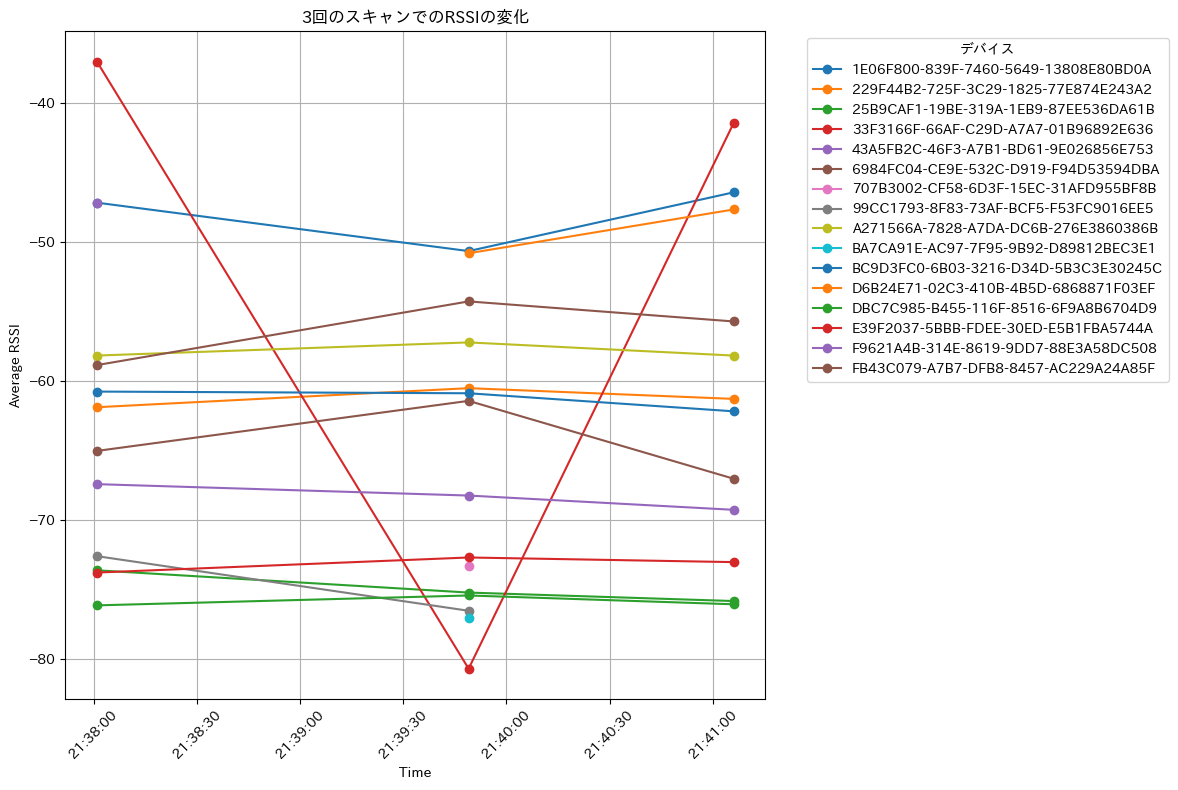

In [4]:
# 全デバイスのRSSIの変動をプロット
if not combined_df.empty:
    plt.figure(figsize=(12, 8))
    
    # デバイスごとにデータをグループ化してプロット
    for address, group in combined_df.groupby('address'):
        # タイムスタンプをX軸にする場合
        if 'timestamp' in group.columns and group['timestamp'].notna().all():
            plt.plot(group['timestamp'], group['average_rssi'], marker='o', linestyle='-', label=address)
            plt.xlabel('Time')
        else:
            # タイムスタンプがない場合は、単純にインデックスをX軸にするなど
            plt.plot(group.index, group['average_rssi'], marker='o', linestyle='-', label=address)
            plt.xlabel('Scan Number') # または適切なラベル
    
    plt.ylabel('Average RSSI')
    plt.title('3回のスキャンでのRSSIの変化')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='デバイス', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("プロットするデータがありません。")